In [31]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt


In [33]:
n_wires = 4
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

The ket representation of the sum of 7 and 3 is [1 1]


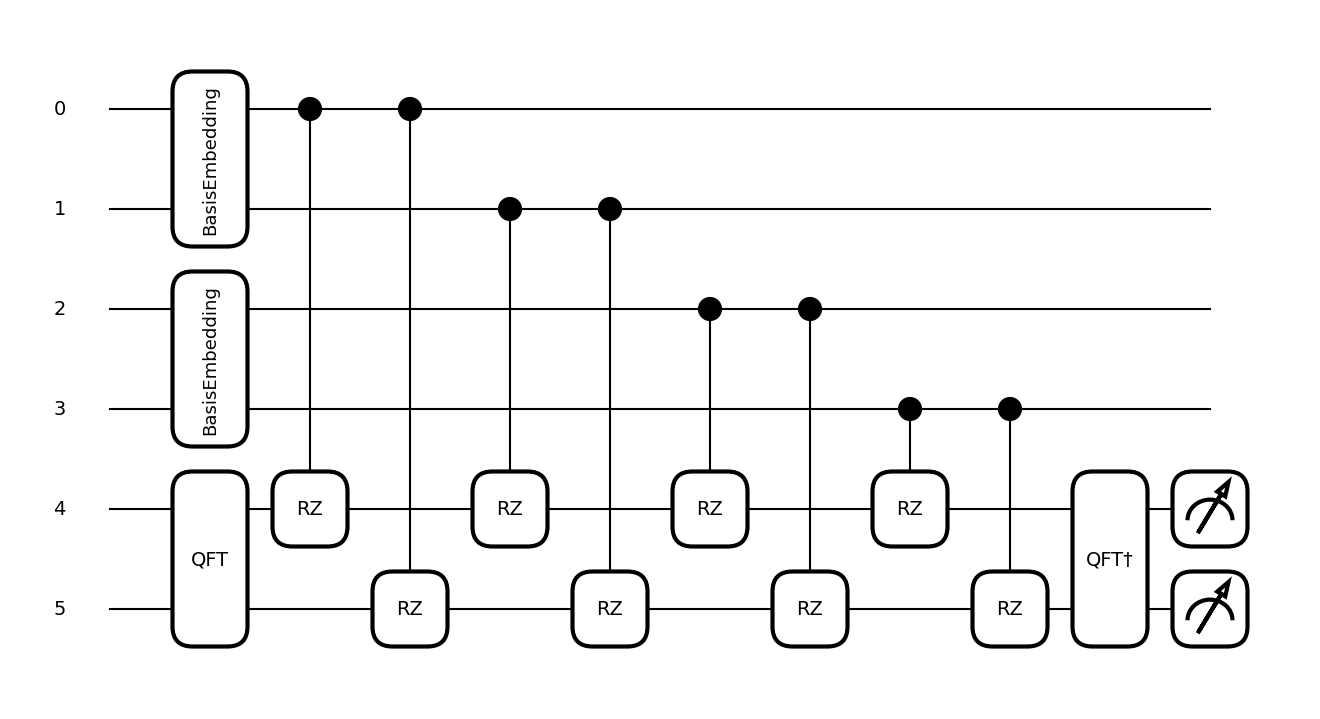

In [35]:
data_1 = [0, 1]             
data_2 = [2, 3]             
combined = [4, 5]   

dev = qml.device("default.qubit", wires=data_1 + data_2 + combined, shots=1)

n_wires = len(dev.wires) 

def addition(wires_m, wires_k, wires_solution):
    qml.QFT(wires=wires_solution)
    for i in range(len(wires_m)):
        qml.ctrl(add_k_fourier, control=wires_m[i])(2 **(len(wires_m) - i - 1), wires_solution)
    for i in range(len(wires_k)):
        qml.ctrl(add_k_fourier, control=wires_k[i])(2 **(len(wires_k) - i - 1), wires_solution)  
    qml.adjoint(qml.QFT)(wires=wires_solution)

@qml.qnode(dev)
def sum2(m, k, wires_m, wires_k, wires_solution):
    qml.BasisEmbedding(m, wires=wires_m)
    qml.BasisEmbedding(k, wires=wires_k)
    addition(wires_m, wires_k, wires_solution)
    return qml.sample(wires=wires_solution)

print(f"The ket representation of the sum of 7 and 3 is "
      f"{sum2(1, 2, data_1, data_2, combined)}")

qml.draw_mpl(sum2, show_all_wires=True)(1, 2, data_1, data_2, combined)
plt.show()